# Obesity or CVD risk (Classification)

- NObeyesdad is the categorical target
- Based on the given dataset, achieved an 83% accuracy rating.

## Import Dependencies

In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [355]:
df = pd.read_csv(r'ObesityDataSet.csv')

# Initial Exploration

In [356]:
print(df.shape)
display(df.info())
display(df.describe())
display(df.head())

(2111, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                    

None

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [357]:
dfs = []

for x in df.columns:
    # Create a DataFrame with information for each column
    column_info = pd.DataFrame({
        'Column': [x],
        'Unique': [df[x].nunique()]
    })
    # Append the DataFrame to the list
    dfs.append(column_info)

# Concatenate all DataFrames in the list
info_table = pd.concat(dfs, ignore_index=True)

# Display the table
display(info_table.sort_values('Unique', ascending=False))


Column  Unique
2                           Height    1574
3                           Weight    1525
1                              Age    1402
10                            CH2O    1268
12                             FAF    1190
13                             TUE    1129
6                             FCVC     810
7                              NCP     635
16                      NObeyesdad       7
15                          MTRANS       5
14                            CALC       4
8                             CAEC       4
11                             SCC       2
9                            SMOKE       2
5                             FAVC       2
4   family_history_with_overweight       2
0                           Gender       2

### Initial Thoughts:
- 17 columns, 2000+ observations. Look at initial 2 variable dependencies
- Binary Columns should be encoded
- Categorical Columns should be encoded
- This is a multi-class categorization - how many classes?

Questions:
- Do we have information on when they were diagnosed?

In [358]:
df.NObeyesdad.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [359]:
# Missing values
print("No null values") if df.dropna().shape == df.shape else print("Null values found")

No null values


#### Pairplot Exploration - Any initial relationships?

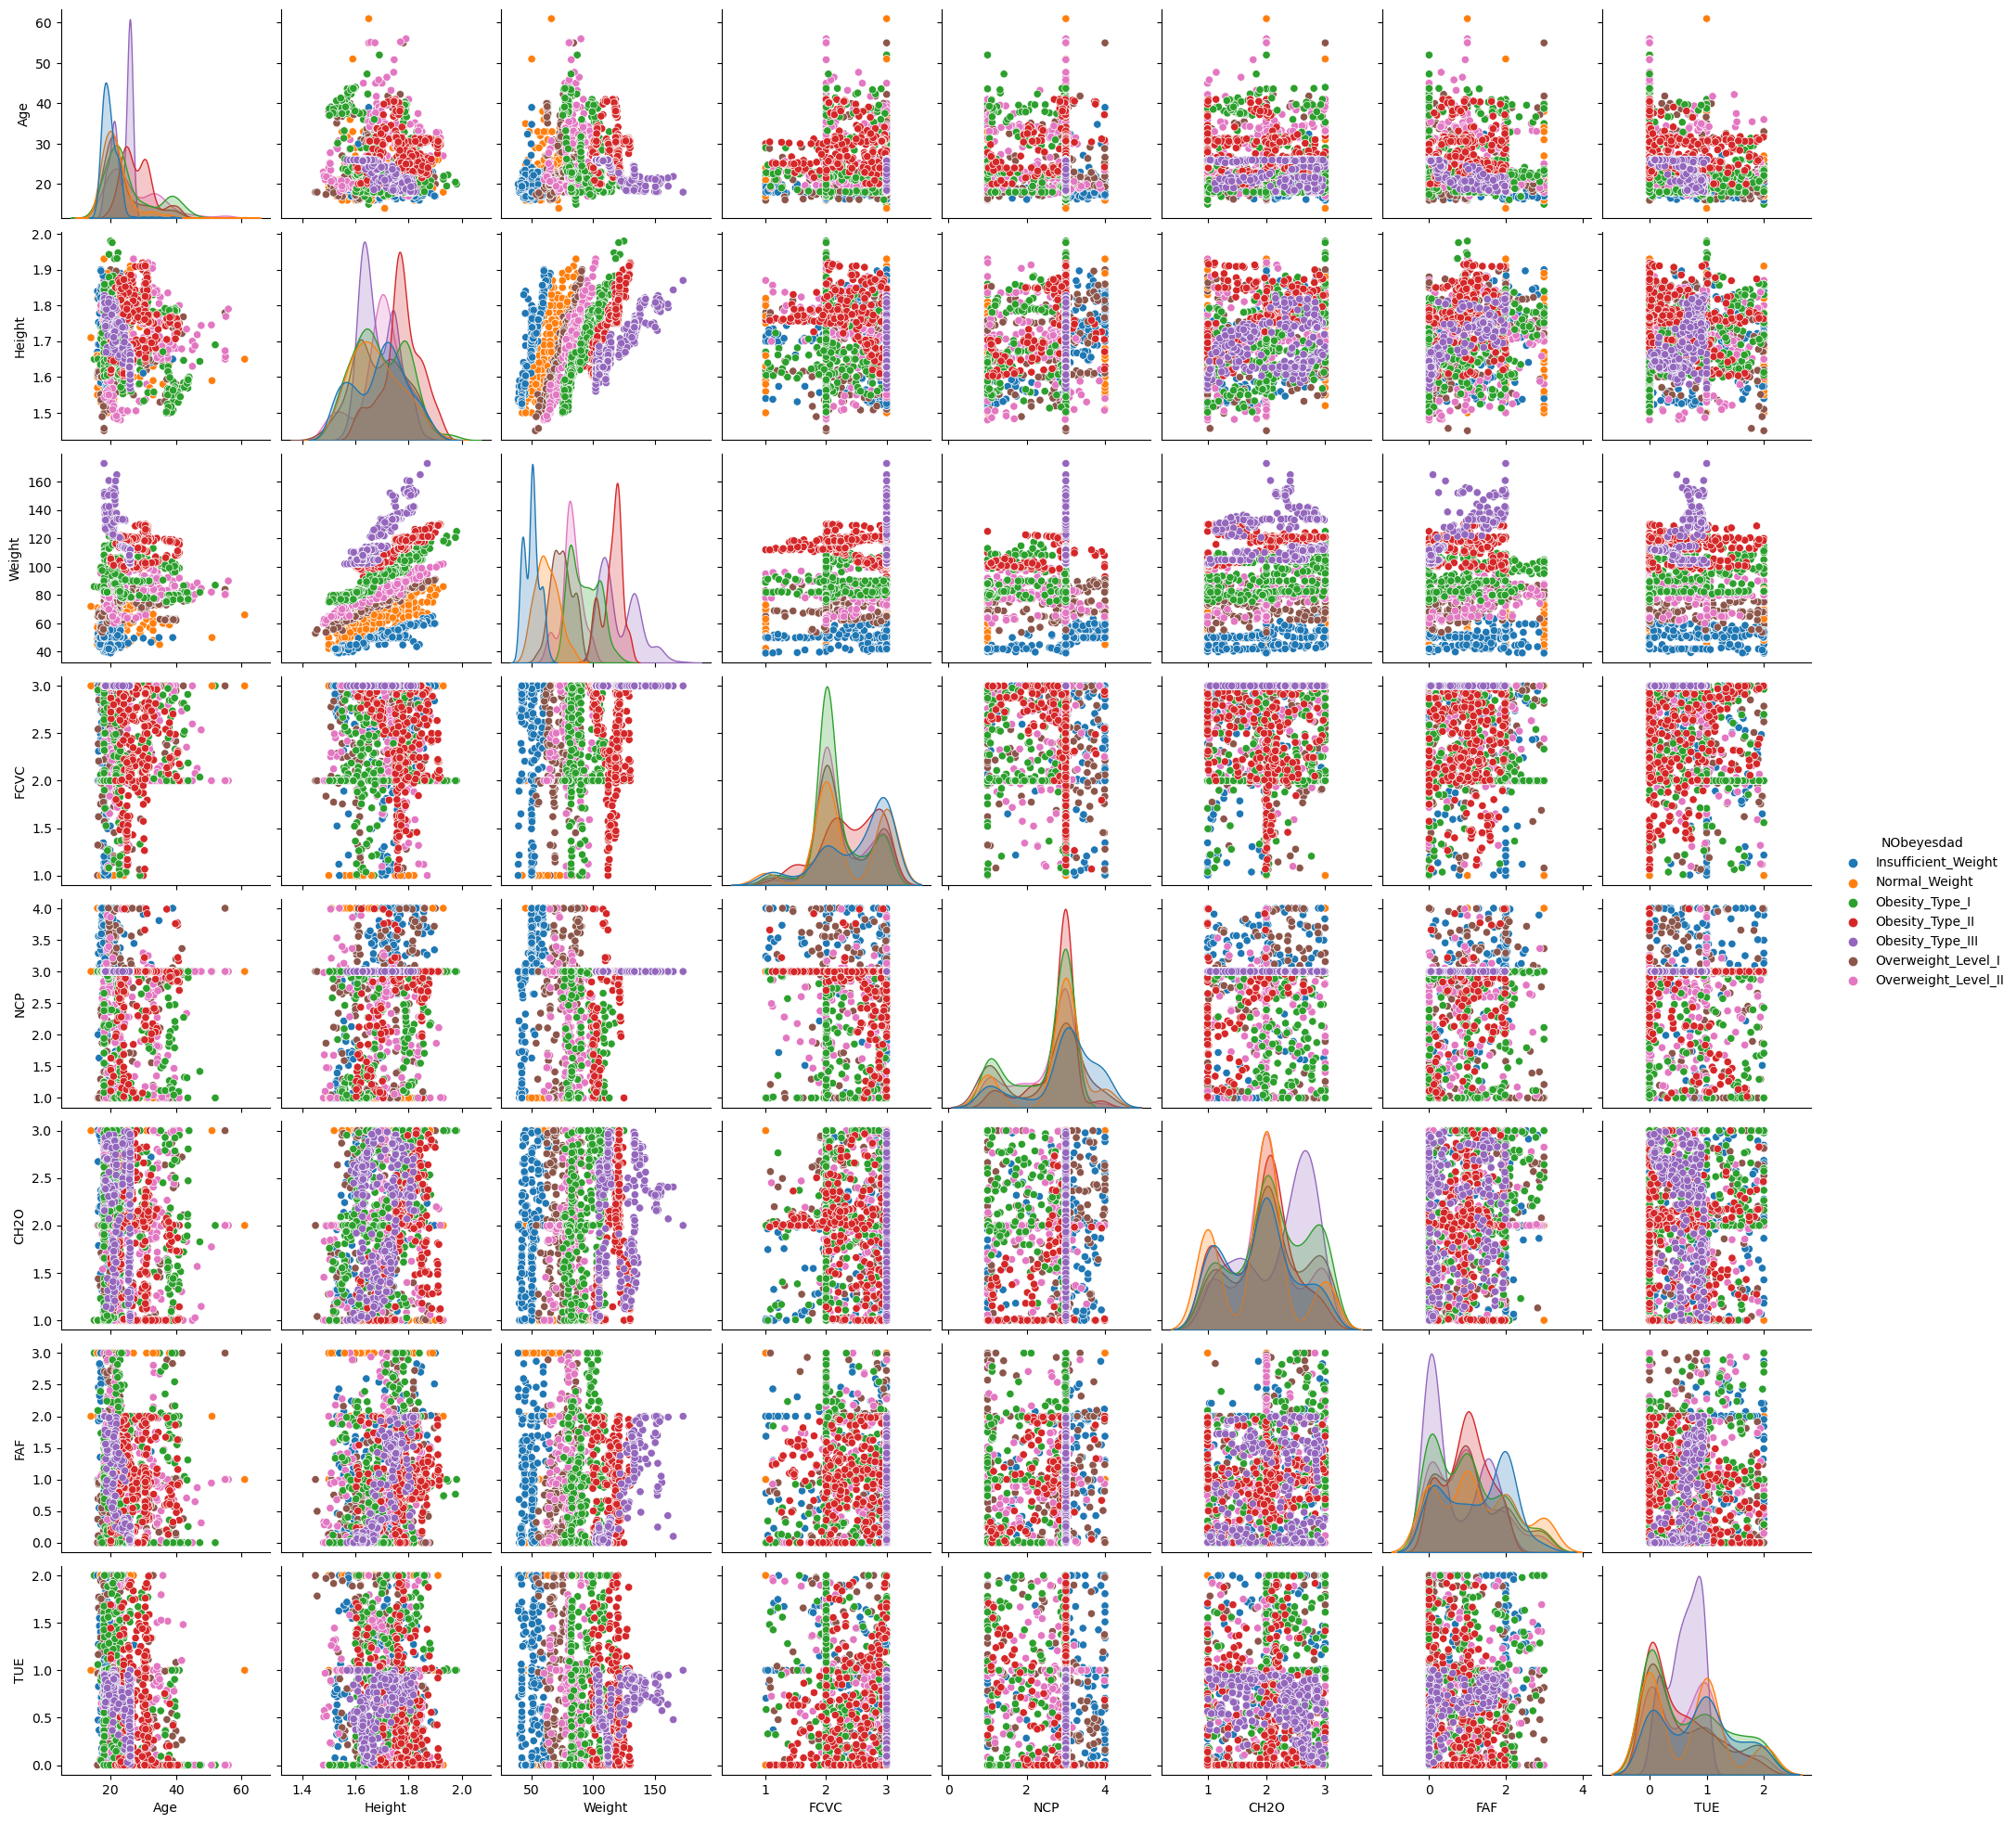

In [360]:
df['NObeyesdad'] = pd.Categorical(df['NObeyesdad'])

# Plot using Seaborn pairplot
sns.pairplot(df, hue='NObeyesdad')
plt.show()

#### Pairplot Thoughts:
- Very clear distinction of obesity classification by Weight and Height.
- Interesting binomial distribution for FCVC - what variable is separating it?
- Same goes for NCP
- CH20 has an interesting tri-distribution for normal weight, and some binomial distribution for others. categorize this.

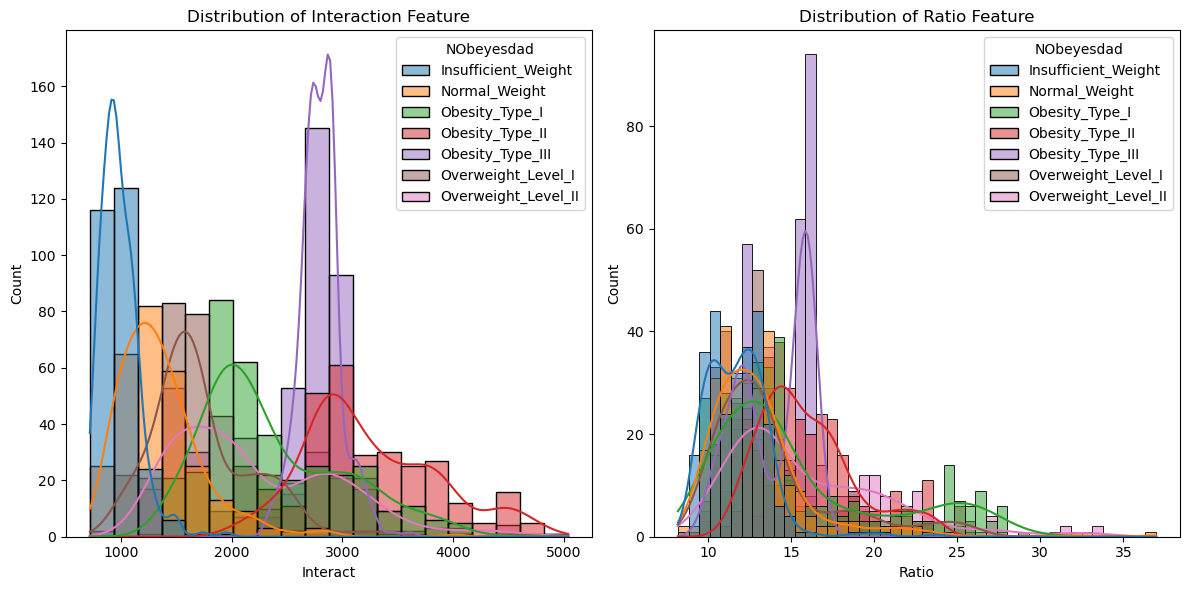

In [361]:
# Create interaction feature
df2 = df.copy()
var1 = df2['Age']
var2 = df2['Weight']
df2['Interact'] = var1 * var2

# Create ratio feature (handling potential division by zero)
df2['Ratio'] = df2['Age'] / df2['Height'].replace(0, np.nan)

# Drop NaN values for ratio feature
df2.dropna(subset=['Ratio'], inplace=True)

# Plot distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df2, x='Interact', hue='NObeyesdad', kde=True)
plt.title('Distribution of Interaction Feature')

plt.subplot(1, 2, 2)
sns.histplot(data=df2, x='Ratio', hue='NObeyesdad', kde=True)
plt.title('Distribution of Ratio Feature')

plt.tight_layout()
plt.show()


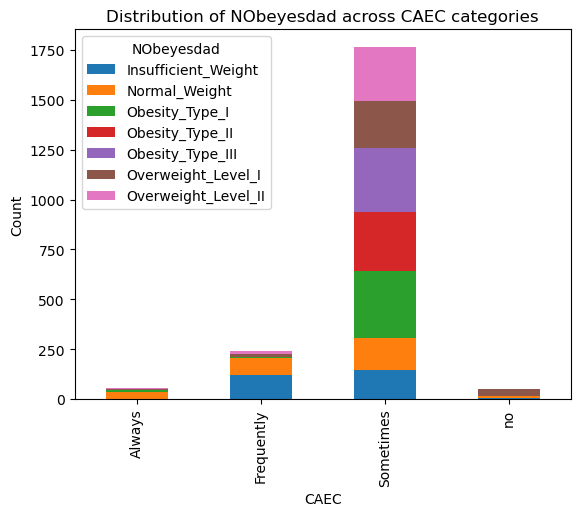

In [362]:
# Group by 'CAEC' and 'NObeyesdad' and calculate counts
varq = 'CAEC'
caec_nobeyesdad_counts = df.groupby([varq, 'NObeyesdad']).size().unstack(fill_value=0)

# Plot the grouped bar plot
caec_nobeyesdad_counts.plot(kind='bar', stacked=True)
plt.xlabel(str(varq))
plt.ylabel('Count')
plt.title(f'Distribution of NObeyesdad across {varq} categories')
plt.legend(title='NObeyesdad')
plt.show()

## Feature Engineering

In [363]:
# There are some major linear relationship divisions for Weight and other dimensions. Create ratios based on these relationships.

def create_interaction_variable(df, var1, var2):
    # Create new variable as the interaction of the two given variables
    new_column_name = f"{var1}_{var2}_interaction"
    df[new_column_name] = df[var1] * df[var2]
    
    # Append the used variables to vars_used
    vars_used.append([var1, var2])

def create_ratio_variable(df, var1, var2):
    # Create new variable as the ratio of the two given variables
    new_column_name = f"{var1}_{var2}_ratio"
    df[new_column_name] = df[var1] / df[var2]
    
    # Append the used variables to vars_used
    vars_used.append([var1, var2])

vars_used = []

create_interaction_variable(df, 'Age', 'Height')
create_ratio_variable(df, 'Height', 'Weight')

# Flatten vars_used
vars_used = [item for sublist in vars_used for item in sublist]

# Remove specific columns
df.drop(columns=vars_used, inplace=True)

In [364]:
# Binning FCVC and NCP columns
# Define bin edges for FCVC and NCP with midpoints
fcvc_bins = [-np.inf, 0.5, 1.5, 2.5, np.inf]
ncp_bins = [-np.inf, 0, 2, np.inf]
CH2O_bins = [-np.inf, 0.5, 1.5, 2.5, np.inf]
FAF_bins = [-np.inf, 0.5, 1.5, 2.5, np.inf]
TUE_bins = [-np.inf, 0.5, 1.5, 2.5, np.inf]

# Create bin labels
fcvc_labels = ['Very Low', 'Low', 'Moderate', 'High']
ncp_labels = ['Low', 'Moderate', 'High']
CH2O_labels = ['Very Low', 'Low', 'Moderate', 'High']
FAF_labels = ['Very Low', 'Low', 'Moderate', 'High']
TUE_labels = ['Very Low', 'Low', 'Moderate', 'High']

# Bin FCVC and NCP columns
df['FCVC_Bin'] = pd.cut(df['FCVC'], bins=fcvc_bins, labels=fcvc_labels)
df['NCP_Bin'] = pd.cut(df['NCP'], bins=ncp_bins, labels=ncp_labels)
df['CH2O_Bin'] = pd.cut(df['CH2O'], bins=CH2O_bins, labels=CH2O_labels)
df['FAF_Bin'] = pd.cut(df['FAF'], bins=FAF_bins, labels=FAF_labels)
df['TUE_Bin'] = pd.cut(df['TUE'], bins=TUE_bins, labels=TUE_labels)

# Perform dummy encoding for the binned columns
df = pd.get_dummies(df, columns=['FCVC_Bin', 'NCP_Bin', 'CH2O_Bin', 'FAF_Bin', 'TUE_Bin'])

# Drop original columns if needed
df.drop(columns=['FCVC', 'NCP', 'CH2O','FAF','TUE'], inplace=True)

# Check the updated DataFrame
display(df.head())

Gender family_history_with_overweight FAVC       CAEC SMOKE  SCC  \
0  Female                            yes   no  Sometimes    no   no   
1  Female                            yes   no  Sometimes   yes  yes   
2    Male                            yes   no  Sometimes    no   no   
3    Male                             no   no  Sometimes    no   no   
4    Male                             no   no  Sometimes    no   no   

         CALC                 MTRANS           NObeyesdad  \
0          no  Public_Transportation        Normal_Weight   
1   Sometimes  Public_Transportation        Normal_Weight   
2  Frequently  Public_Transportation        Normal_Weight   
3  Frequently                Walking   Overweight_Level_I   
4   Sometimes  Public_Transportation  Overweight_Level_II   

   Age_Height_interaction  Height_Weight_ratio  FCVC_Bin_Very Low  \
0                   34.02             0.025313              False   
1                   31.92             0.027143              False   
2                   41.40             0.023377              False   
3                   48.60             0.020690              False   
4                   39.16             0.019822              False   

   FCVC_Bin_Low  FCVC_Bin_Moderate  FCVC_Bin_High  NCP_Bin_Low  \
0         False               True          False        False   
1         False              False           True        False   
2         False               True          False        False   
3         False              False           True        False   
4         False               True          False        False   

   NCP_Bin_Moderate  NCP_Bin_High  CH2O_Bin_Very Low  CH2O_Bin_Low  \
0             False          True              False         False   
1             False          True              False         False   
2             False          True              False         False   
3             False          True              False         False   
4              True         False              False         False   

   CH2O_Bin_Moderate  CH2O_Bin_High  FAF_Bin_Very Low  FAF_Bin_Low  \
0               True          False              True        False   
1              False           True             False        False   
2               True          False             False        False   
3               True          False             False        False   
4               True          False              True        False   

   FAF_Bin_Moderate  FAF_Bin_High  TUE_Bin_Very Low  TUE_Bin_Low  \
0             False         False             False         True   
1             False          True              True        False   
2              True         False             False         True   
3              True         False              True        False   
4             False         False              True        False   

   TUE_Bin_Moderate  TUE_Bin_High  
0             False         False  
1             False         False  
2             False         False  
3             False         False  
4             False         False

In [366]:
# Calculate relative proportions for each value of NObeyesdad when CAEC is 'Frequently' or 'Sometimes'
relative_proportions_frequently = df[df['CAEC'].isin(['Frequently','Always'])]['NObeyesdad'].value_counts(normalize=True)
relative_proportions_sometimes = df[df['CAEC'].isin(['Sometimes','no'])]['NObeyesdad'].value_counts(normalize=True)

# Define the columns to be assigned
columns_to_assign = ['Normal_Weight', 'Overweight_Level_I',
                     'Overweight_Level_II', 'Obesity_Type_I',
                     'Insufficient_Weight', 'Obesity_Type_II',
                     'Obesity_Type_III']

# Assign relative proportions to the specified columns for CAEC values 'Frequently' and 'Always'
df.loc[df['CAEC'].isin(['Frequently', 'Always']), columns_to_assign] = [
    [relative_proportions_frequently.get(category, 0) for category in columns_to_assign]
]
# Assign relative proportions to the specified columns for CAEC values 'Sometimes' and 'No'
df.loc[df['CAEC'].isin(['Sometimes', 'no']), columns_to_assign] = [
    [relative_proportions_sometimes.get(category, 0) for category in columns_to_assign]
]

for col in columns_to_assign:
    df.rename(columns={col:"CAEC_"+col}, inplace=True)

df.drop('CAEC',axis=1,inplace=True)

In [368]:
# Binary Encoding
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df['FAVC'] = df['FAVC'].map({'no': 0, 'yes': 1})
df['family_history_with_overweight'] = df['family_history_with_overweight'].map({'no': 0, 'yes': 1})
df['SMOKE'] = df['SMOKE'].map({'no': 0, 'yes': 1})
df['SCC'] = df['SCC'].map({'no': 0, 'yes': 1})

# One-Hot Encoding
df = pd.get_dummies(df, columns=['CALC'], prefix='CALC')

df.loc[df['MTRANS'].isin(['Bike','Motorbike','Walking']),'MTRANS'] = 'Bike_Walk'
df = pd.get_dummies(df, columns=['MTRANS'], prefix='MTRANS')

In [371]:
df.head()

Gender  family_history_with_overweight  FAVC  SMOKE  SCC  \
0       0                               1     0      0    0   
1       0                               1     0      1    1   
2       1                               1     0      0    0   
3       1                               0     0      0    0   
4       1                               0     0      0    0   

            NObeyesdad  Age_Height_interaction  Height_Weight_ratio  \
0        Normal_Weight                   34.02             0.025313   
1        Normal_Weight                   31.92             0.027143   
2        Normal_Weight                   41.40             0.023377   
3   Overweight_Level_I                   48.60             0.020690   
4  Overweight_Level_II                   39.16             0.019822   

   FCVC_Bin_Very Low  FCVC_Bin_Low  FCVC_Bin_Moderate  FCVC_Bin_High  \
0              False         False               True          False   
1              False         False              False           True   
2              False         False               True          False   
3              False         False              False           True   
4              False         False               True          False   

   NCP_Bin_Low  NCP_Bin_Moderate  NCP_Bin_High  CH2O_Bin_Very Low  \
0        False             False          True              False   
1        False             False          True              False   
2        False             False          True              False   
3        False             False          True              False   
4        False              True         False              False   

   CH2O_Bin_Low  CH2O_Bin_Moderate  CH2O_Bin_High  FAF_Bin_Very Low  \
0         False               True          False              True   
1         False              False           True             False   
2         False               True          False             False   
3         False               True          False             False   
4         False               True          False              True   

   FAF_Bin_Low  FAF_Bin_Moderate  FAF_Bin_High  TUE_Bin_Very Low  TUE_Bin_Low  \
0        False             False         False             False         True   
1        False             False          True              True        False   
2        False              True         False             False         True   
3        False              True         False              True        False   
4        False             False         False              True        False   

   TUE_Bin_Moderate  TUE_Bin_High  CAEC_Normal_Weight  \
0             False         False            0.093062   
1             False         False            0.093062   
2             False         False            0.093062   
3             False         False            0.093062   
4             False         False            0.093062   

   CAEC_Overweight_Level_I  CAEC_Overweight_Level_II  CAEC_Obesity_Type_I  \
0                 0.149229                  0.149229             0.186674   
1                 0.149229                  0.149229             0.186674   
2                 0.149229                  0.149229             0.186674   
3                 0.149229                  0.149229             0.186674   
4                 0.149229                  0.149229             0.186674   

   CAEC_Insufficient_Weight  CAEC_Obesity_Type_II  CAEC_Obesity_Type_III  \
0                  0.082048              0.161894               0.177863   
1                  0.082048              0.161894               0.177863   
2                  0.082048              0.161894               0.177863   
3                  0.082048              0.161894               0.177863   
4                  0.082048              0.161894               0.177863   

   CALC_Always  CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Automobile  \
0        False            False           False     True              False   
1        False

## Model Preparation

### Establish Baseline

In [372]:
proportions = df.groupby('NObeyesdad').size() / len(df)
print(proportions)


NObeyesdad
Insufficient_Weight    0.128849
Normal_Weight          0.135955
Obesity_Type_I         0.166272
Obesity_Type_II        0.140692
Obesity_Type_III       0.153482
Overweight_Level_I     0.137376
Overweight_Level_II    0.137376
dtype: float64


- The highest proportion type is Obesity_Type_I (16.63%). Therefore, we will use 16.63% as our baseline prediction level.

#### Logistic Regression

In [374]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Splitting the data into features (X) and target variable (y)
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Logistic Regression model
model = LogisticRegression(max_iter=1000, multi_class='auto')  # Initialize the model for multi-class prediction
model.fit(X_train, y_train)  # Train the model

# Predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Model evaluation
print(classification_report(y_test, y_pred))


Accuracy: 0.5531914893617021
                     precision    recall  f1-score   support

Insufficient_Weight       0.53      0.59      0.56        56
      Normal_Weight       0.46      0.31      0.37        62
     Obesity_Type_I       0.54      0.54      0.54        78
    Obesity_Type_II       0.60      0.67      0.63        58
   Obesity_Type_III       0.89      1.00      0.94        63
 Overweight_Level_I       0.42      0.41      0.41        56
Overweight_Level_II       0.29      0.30      0.30        50

           accuracy                           0.55       423
          macro avg       0.53      0.55      0.54       423
       weighted avg       0.54      0.55      0.54       423



### Neural Net Classification

In [375]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


In [377]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6])

In [378]:
# Assuming 'X' contains features and 'y' contains target labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_encoded = label_encoder.fit_transform(y_train)
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(7, activation='softmax')  # 7 output classes for multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer labels
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy}')

# Generate predictions
#y_pred = model.predict_classes(X_test_scaled)
y_pred=model.predict(X_test_scaled) 
y_pred=np.argmax(y_pred,axis=1)

# Display classification report
print(classification_report(y_test, y_pred))


Epoch 1/10
48/48 [==============================] - 0s 2ms/step - loss: 1.6638 - accuracy: 0.3897 - val_loss: 1.2815 - val_accuracy: 0.5385
Epoch 2/10
48/48 [==============================] - 0s 813us/step - loss: 1.1976 - accuracy: 0.5635 - val_loss: 0.9613 - val_accuracy: 0.6568
Epoch 3/10
48/48 [==============================] - 0s 890us/step - loss: 0.9910 - accuracy: 0.6313 - val_loss: 0.8029 - val_accuracy: 0.7515
Epoch 4/10
48/48 [==============================] - 0s 869us/step - loss: 0.8494 - accuracy: 0.6801 - val_loss: 0.7115 - val_accuracy: 0.7515
Epoch 5/10
48/48 [==============================] - 0s 902us/step - loss: 0.7505 - accuracy: 0.7044 - val_loss: 0.6606 - val_accuracy: 0.7633
Epoch 6/10
48/48 [==============================] - 0s 873us/step - loss: 0.6948 - accuracy: 0.7334 - val_loss: 0.5755 - val_accuracy: 0.7811
Epoch 7/10
48/48 [==============================] - 0s 880us/step - loss: 0.6071 - accuracy: 0.7689 - val_loss: 0.5078 - val_accuracy: 0.7929
Epoch 8/